In [1]:
from scipy.integrate import trapezoid

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_json("build/data.json", lines=True)
df.head()

,timestamp,total,apower,current,voltage
0,2025-11-25 08:38:00,840.253,0.0,0.0,123.7
1,2025-11-25 08:39:00,840.253,0.0,0.0,123.8
2,2025-11-25 08:40:00,840.253,0.0,0.0,123.9
3,2025-11-25 08:41:00,840.253,0.0,0.0,123.8
4,2025-11-25 08:42:00,840.253,0.0,0.0,123.9


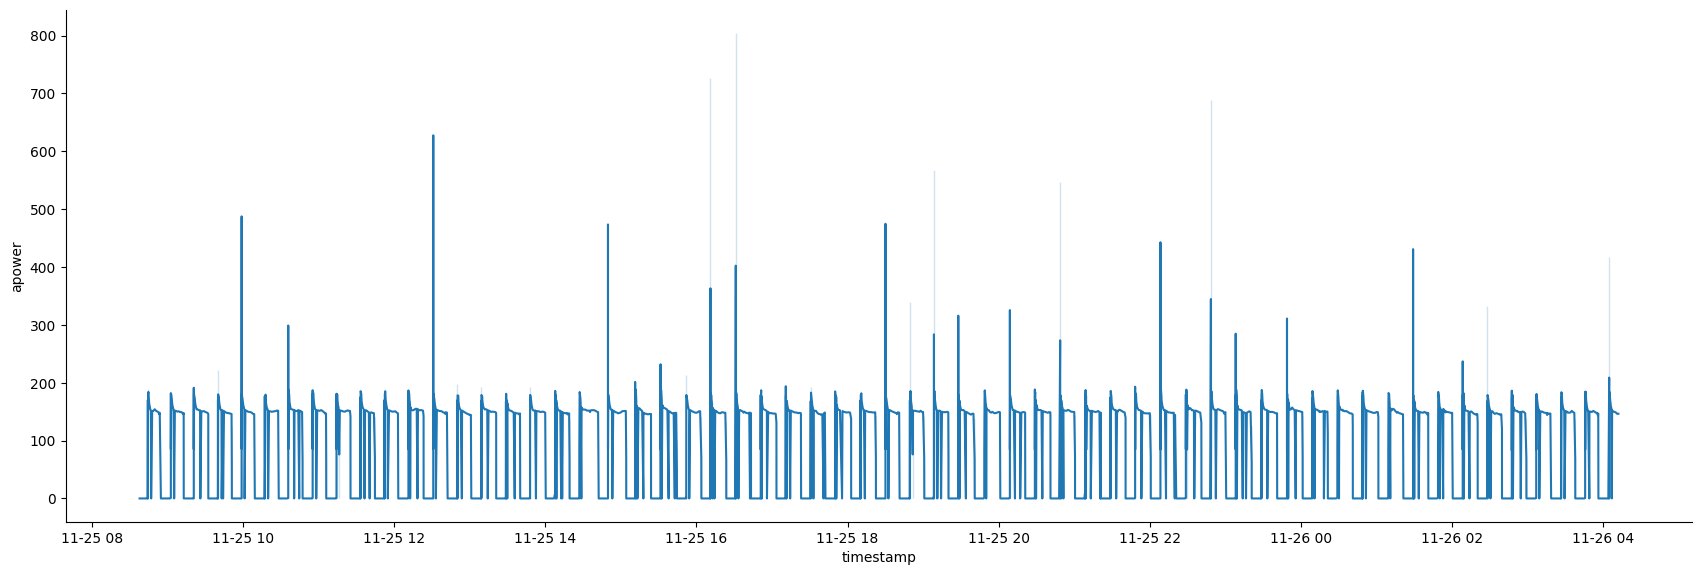

In [3]:
o = sns.relplot(data=df, kind='line', x='timestamp', y='apower')
o.figure.set_size_inches((20, 6))

In [4]:
secs = pd.to_numeric(df['timestamp']) / 1e9
totalWattSeconds = trapezoid(df['apower'], secs)
totalSeconds = secs.max() - secs.min()
averageWatts = totalWattSeconds / totalSeconds
print('Total watt hours observed in %.1fh: %.1f. Average watts: %.1f' %
      (totalSeconds / 3600, totalWattSeconds / 3600, averageWatts))

Total watt hours observed in 19.6h: 1698.5. Average watts: 86.8
